# Gaussian Simulation with Time-Varying Means

This notebook demonstrates a simulation of N Gaussian distributions where the mean shifts linearly over time.

**Simulation Parameters:**
- N: Number of Gaussian distributions
- u0: Initial mean value
- u_n: Final mean value  
- s: Standard deviation (constant)
- m: Slope of linear relationship (u = u0 + m*t)
- t: Time from 0 to N

The simulation generates Gaussian distributions at each time step t, where the mean follows the linear relationship: **μ(t) = u0 + m*t**


In [17]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

print("Libraries imported successfully!")
print("Available functions:")
print("- numpy for numerical operations")
print("- matplotlib for plotting and animations")
print("- scipy.stats for Gaussian curve calculations")


Libraries imported successfully!
Available functions:
- numpy for numerical operations
- matplotlib for plotting and animations
- scipy.stats for Gaussian curve calculations


In [20]:
# Simulation Parameters (User Configurable)
class SimulationConfig:
    def __init__(self):
        # Basic parameters
        self.N = 50          # Number of time steps (and Gaussian curves)
        self.u0 = 0.0        # Initial mean value
        self.u_n = 10.0      # Final mean value
        self.s_0 = 1.0         # Standard deviation at the start
        self.s_n = 1.5       # standard deviation at the end
        # Derived parameters
        self.m = (self.u_n - self.u0) / self.N  # Slope: m = (u_n - u0) / N
        self.s = self.s_0 + (self.s_n - self.s_0) * (np.arange(self.N) / self.N)
        # Simulation settings
        self.x_range = (-5, 15)  # Range for plotting curves
        self.n_points = 50     # Number of points for smooth curves
        
    def update_parameters(self, N=None, u0=None, u_n=None, s=None):
        """Update simulation parameters"""
        if N is not None:
            self.N = N
        if u0 is not None:
            self.u0 = u0
        if u_n is not None:
            self.u_n = u_n
        if s is not None:
            self.s = s
        
        # Recalculate slope
        self.m = (self.u_n - self.u0) / self.N
        
    def print_config(self):
        """Print current configuration"""
        print("=== Simulation Configuration ===")
        print(f"N (time steps): {self.N}")
        print(f"u0 (initial mean): {self.u0}")
        print(f"u_n (final mean): {self.u_n}")
        print(f"s (std deviation): {self.s}")
        print(f"m (slope): {self.m:.4f}")
        print(f"Linear relationship: μ(t) = {self.u0} + {self.m:.4f}*t")
        print(f"Curve resolution: {self.n_points} points")
        print("===============================")

# Initialize configuration
config = SimulationConfig()
config.print_config()


=== Simulation Configuration ===
N (time steps): 50
u0 (initial mean): 0.0
u_n (final mean): 10.0
s (std deviation): [1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13
 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27
 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41
 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49]
m (slope): 0.2000
Linear relationship: μ(t) = 0.0 + 0.2000*t
Curve resolution: 50 points


In [21]:
# Gaussian Curve Simulation Functions

def generate_gaussian_curve(mean, std, x_values):
    """Generate Gaussian curve (PDF) values for given x values"""
    return stats.norm.pdf(x_values, mean, std)

def simulate_time_varying_gaussian_curves(config):
    """
    Simulate N Gaussian curves with time-varying means
    
    Parameters:
    - config: SimulationConfig object containing all parameters
    
    Returns:
    - times: array of time steps
    - means: array of means at each time step
    - curves: list of curve values for each time step
    - x_values: x-axis values for plotting
    """
    times = np.arange(config.N)
    means = config.u0 + config.m * times
    
    # Generate x values for smooth curves
    x_values = np.linspace(config.x_range[0], config.x_range[1], config.n_points)
    
    curves = []
    
    print(f"Generating {config.N} Gaussian curves...")
    
    for t in range(config.N):
        # Generate curve values
        curve_values = generate_gaussian_curve(means[t], config.s, x_values)
        curves.append(curve_values)
        
        if (t + 1) % 10 == 0:
            print(f"Completed {t + 1}/{config.N} curves")
    
    print("Simulation completed!")
    return times, means, curves, x_values

# Run the simulation
times, means, curves, x_values = simulate_time_varying_gaussian_curves(config)

print(f"\nSimulation Results:")
print(f"Time range: {times[0]} to {times[-1]}")
print(f"Mean range: {means[0]:.2f} to {means[-1]:.2f}")
print(f"Curve resolution: {len(x_values)} points per curve")
print(f"Total curves generated: {len(curves)}")


Generating 50 Gaussian curves...
Completed 10/50 curves
Completed 20/50 curves
Completed 30/50 curves
Completed 40/50 curves
Completed 50/50 curves
Simulation completed!

Simulation Results:
Time range: 0 to 49
Mean range: 0.00 to 9.80
Curve resolution: 50 points per curve
Total curves generated: 50


Creating visualizations...


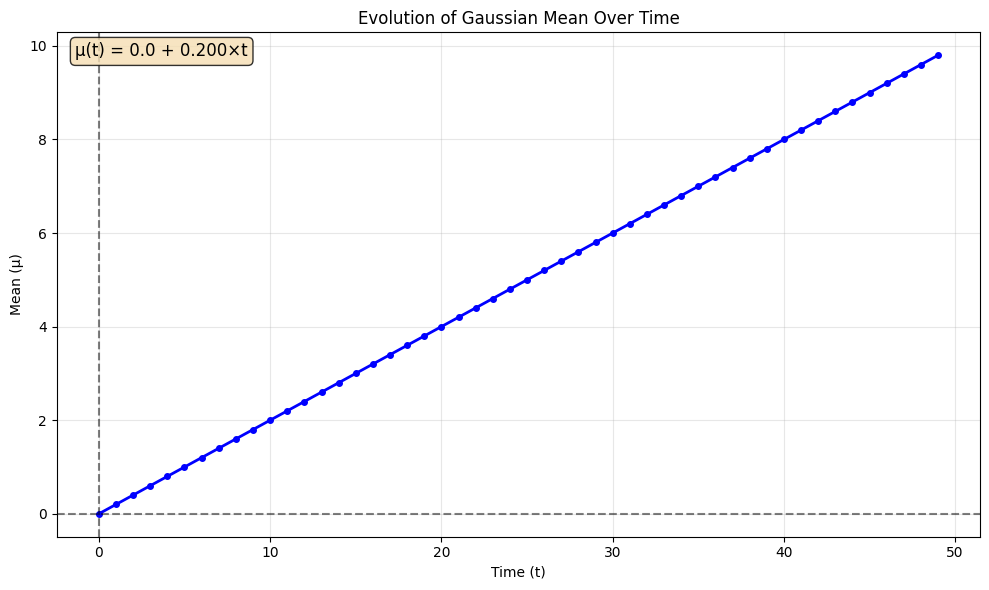

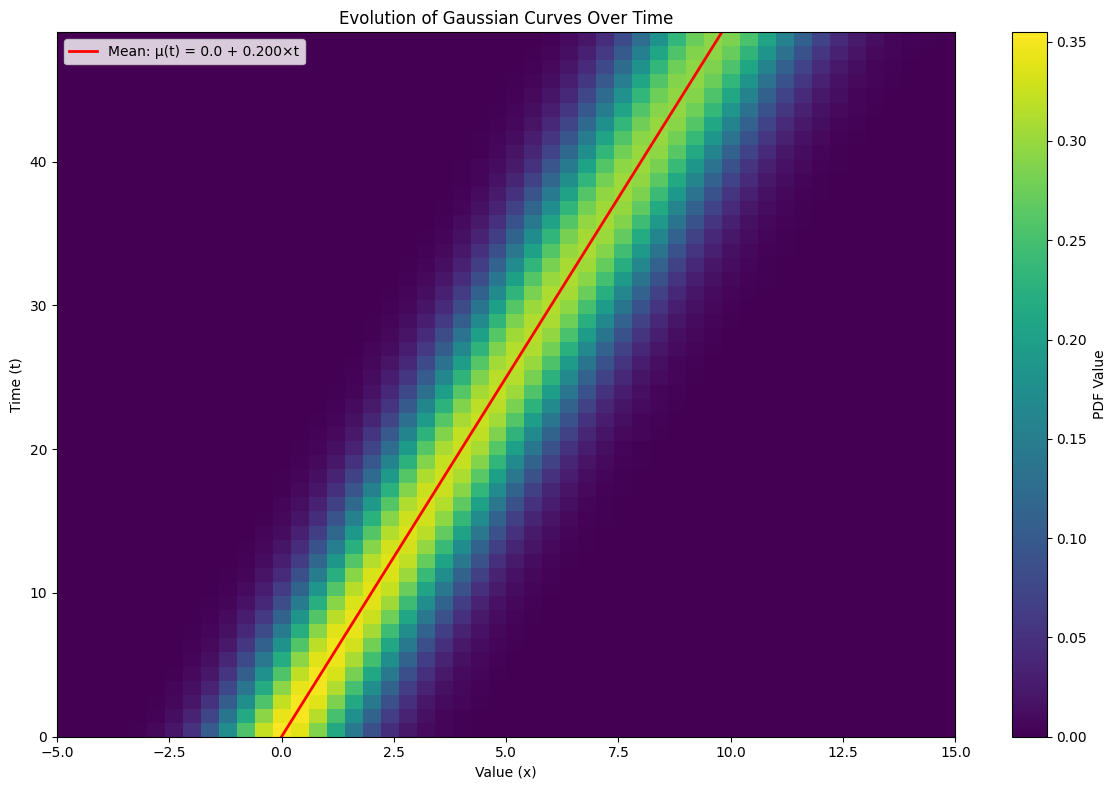

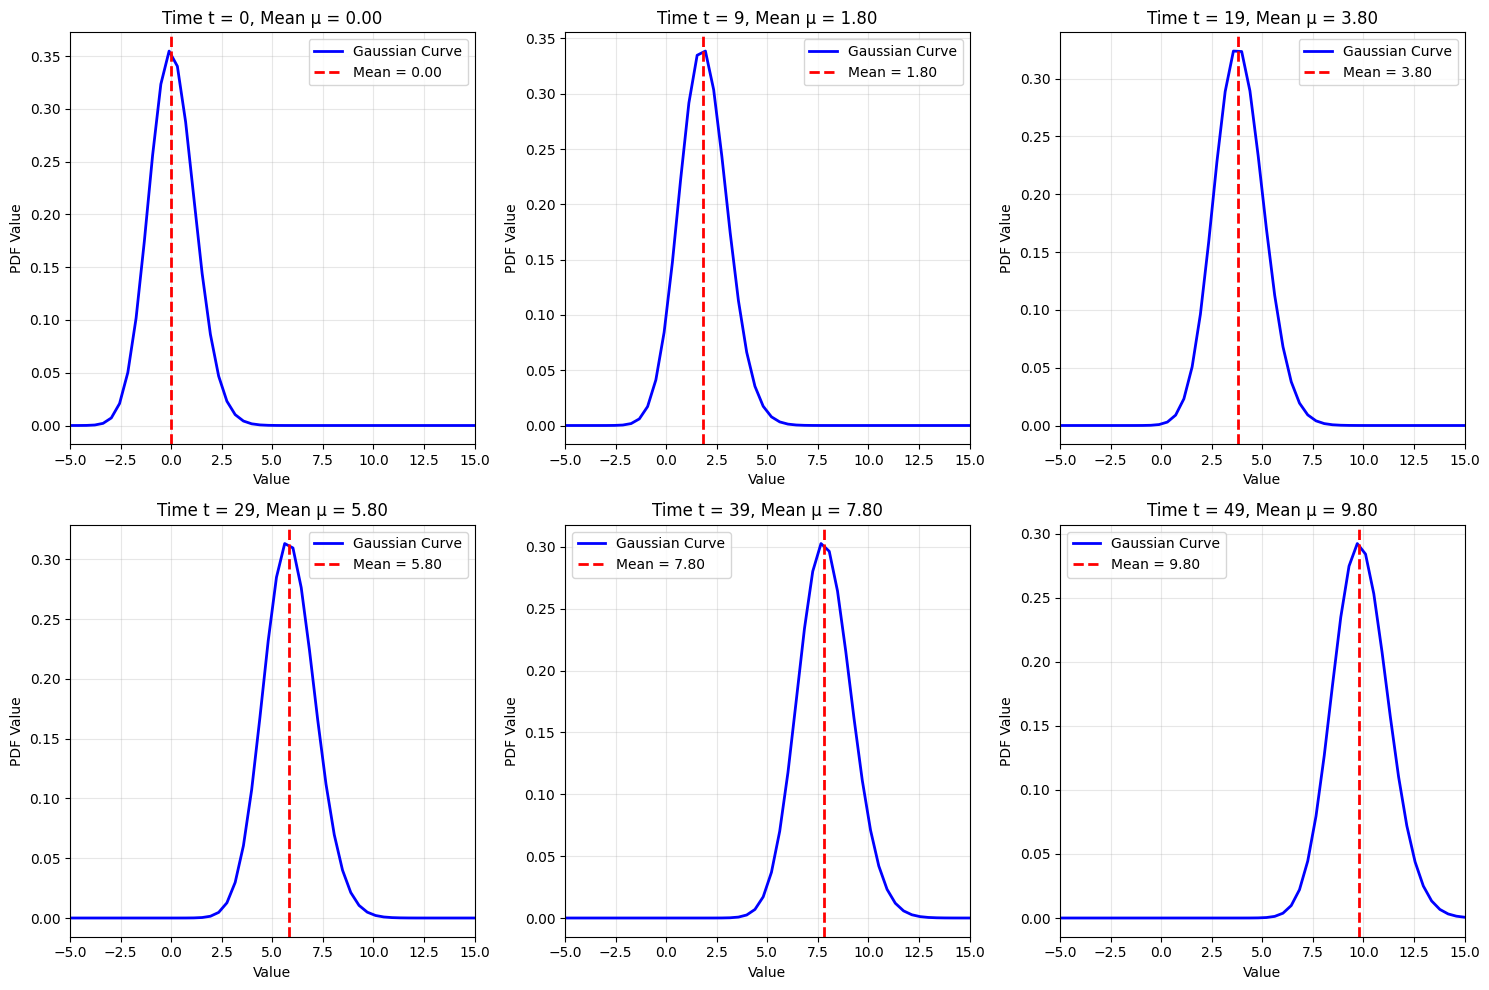

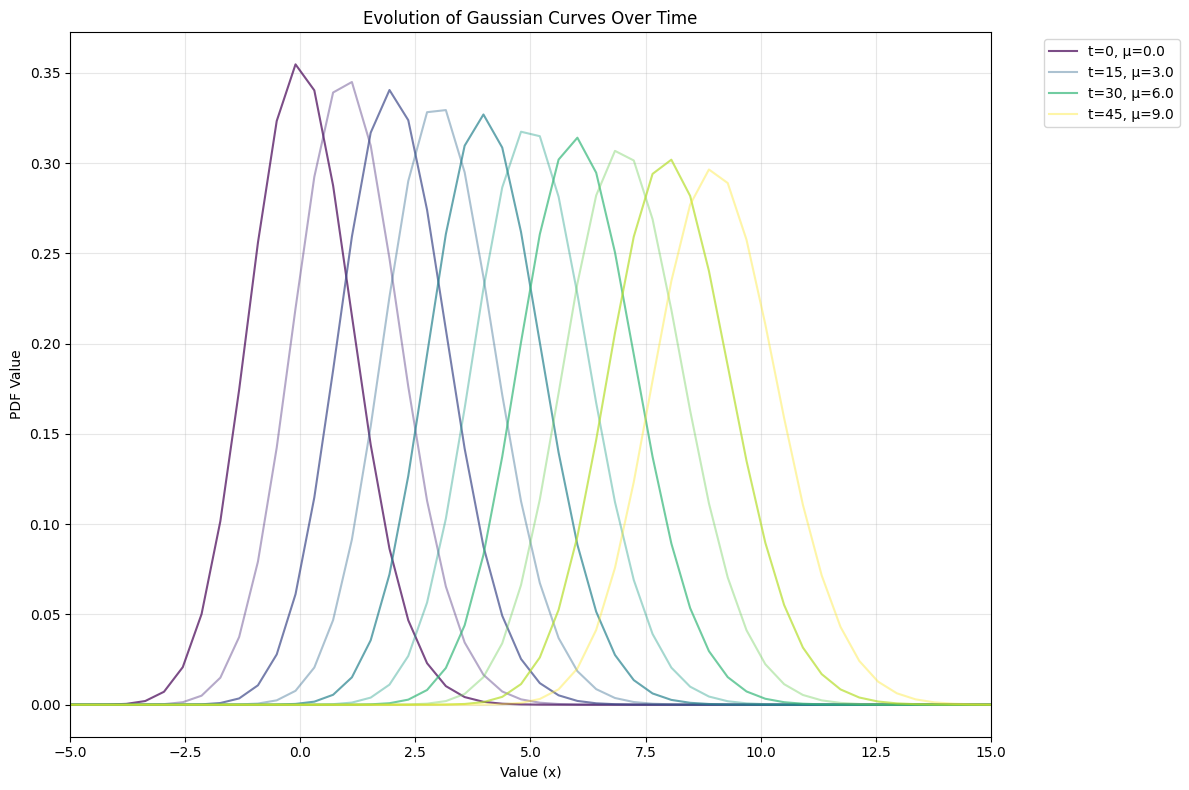

All visualizations completed!


In [22]:

# Visualization Functions

def plot_mean_evolution(times, means):
    """Plot how the mean evolves over time"""
    plt.figure(figsize=(10, 6))
    plt.plot(times, means, 'b-', linewidth=2, marker='o', markersize=4)
    plt.xlabel('Time (t)')
    plt.ylabel('Mean (μ)')
    plt.title('Evolution of Gaussian Mean Over Time')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
    
    # Add equation text
    plt.text(0.02, 0.98, f'μ(t) = {config.u0} + {config.m:.3f}×t', 
             transform=plt.gca().transAxes, fontsize=12, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def plot_gaussian_evolution_heatmap(times, means, curves, x_values):
    """Create a heatmap showing the evolution of Gaussian curves"""
    # Create a 2D array for the heatmap
    curves_matrix = np.array(curves)
    
    plt.figure(figsize=(12, 8))
    
    # Create heatmap
    im = plt.imshow(curves_matrix, aspect='auto', origin='lower', 
                    extent=[x_values[0], x_values[-1], times[0], times[-1]], 
                    cmap='viridis')
    
    plt.colorbar(im, label='PDF Value')
    plt.xlabel('Value (x)')
    plt.ylabel('Time (t)')
    plt.title('Evolution of Gaussian Curves Over Time')
    
    # Add mean line
    plt.plot(means, times, 'r-', linewidth=2, label=f'Mean: μ(t) = {config.u0} + {config.m:.3f}×t')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def plot_gaussian_curves_at_times(times, curves, means, x_values, config, n_plots=6):
    """Plot Gaussian curves at different time points"""
    # Select evenly spaced time points
    time_indices = np.linspace(0, len(times)-1, n_plots, dtype=int)
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, t_idx in enumerate(time_indices):
        ax = axes[i]
        
        # Plot Gaussian curve
        ax.plot(x_values, curves[t_idx], 'b-', linewidth=2, label='Gaussian Curve')
        
        # Mark the mean
        ax.axvline(x=means[t_idx], color='r', linestyle='--', linewidth=2, label=f'Mean = {means[t_idx]:.2f}')
        
        ax.set_title(f'Time t = {times[t_idx]}, Mean μ = {means[t_idx]:.2f}')
        ax.set_xlabel('Value')
        ax.set_ylabel('PDF Value')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_xlim(config.x_range)
    
    plt.tight_layout()
    plt.show()

def plot_overlapping_curves(times, curves, means, x_values, config, step=5):
    """Plot overlapping Gaussian curves to show evolution"""
    plt.figure(figsize=(12, 8))
    
    # Plot curves with different colors
    colors = plt.cm.viridis(np.linspace(0, 1, len(times[::step])))
    
    for i, t_idx in enumerate(range(0, len(times), step)):
        alpha = 0.7 if i % 2 == 0 else 0.4  # Alternate transparency
        plt.plot(x_values, curves[t_idx], color=colors[i], 
                linewidth=1.5, alpha=alpha, 
                label=f't={times[t_idx]}, μ={means[t_idx]:.1f}' if i % 3 == 0 else "")
    
    plt.xlabel('Value (x)')
    plt.ylabel('PDF Value')
    plt.title('Evolution of Gaussian Curves Over Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xlim(config.x_range)
    
    plt.tight_layout()
    plt.show()

# Create visualizations
print("Creating visualizations...")

# 1. Mean evolution plot
plot_mean_evolution(times, means)

# 2. Heatmap of curve evolution
plot_gaussian_evolution_heatmap(times, means, curves, x_values)

# 3. Gaussian curves at different time points
plot_gaussian_curves_at_times(times, curves, means, x_values, config)

# 4. Overlapping curves to show evolution
plot_overlapping_curves(times, curves, means, x_values, config)

print("All visualizations completed!")


## Summary

This notebook demonstrates a complete simulation of **N Gaussian curves with time-varying means** following the linear relationship:

**μ(t) = u₀ + m×t**

### Key Features:

1. **Configurable Parameters**: Easy to modify N, u₀, uₙ, and σ
2. **Comprehensive Visualization**: 
   - Mean evolution over time
   - Heatmap showing curve evolution
   - Individual Gaussian curves at different time points
   - Overlapping curves to show evolution
3. **Animation Support**: Optional animated GIF creation
4. **Interactive Experimentation**: Functions to easily test different parameter sets

### Usage Examples:

```python
# Try different parameters
run_simulation_with_new_parameters(N=30, u0=-5, u_n=15, s=2.0)

# Or modify individual parameters
run_simulation_with_new_parameters(u0=5)  # Change initial mean
run_simulation_with_new_parameters(s=0.5)  # Change standard deviation

# Create animation (optional)
anim = create_gaussian_animation(times, curves, means, x_values, config)
```

### Mathematical Foundation:

- **Linear Mean Evolution**: μ(t) = u₀ + m×t where m = (uₙ - u₀)/N
- **Constant Variance**: σ² remains constant across all time steps
- **Gaussian Curves**: PDF(x,t) = (1/√(2πσ²)) × exp(-(x-μ(t))²/(2σ²))

This simulation is useful for studying:
- Time-varying probability density functions
- Linear trend analysis in probability distributions
- Educational demonstrations of Gaussian curve properties
- Visualizing how distributions evolve over time
